Не берем привилегированные

Price to Cash flow from 10 to 20 (TODO)

https://www.investing.com/stock-screener/?sp=country::56|sector::a|industry::a|equityType::a|aprfcfps_us::10,20%3Ceq_market_cap;1

In [15]:
%pip install investpy/dist/investpy-1.0-py3-none-any.whlestpy-1.0-py3-none-any.whl --force-reinstall

Processing ./investpy/dist/investpy-1.0-py3-none-any.whlestpy-1.0-py3-none-any.whl
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/yourass/Desktop/proga/hse21/hse_subj/finances/sem3/hw01/investpy/dist/investpy-1.0-py3-none-any.whlestpy-1.0-py3-none-any.whl'

Note: you may need to restart the kernel to use updated packages.


In [16]:
%pip install investpy --force-reinstall

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
sys.path.append('investpy')

import investpy
import random
import numpy as np

In [2]:
class StockData:
  def calculate_info(self):
      self.average = self.close.mean()
      self.abs_growth = self.close[-1] - self.close[0]
      self.rel_growth = self.abs_growth/self.close[0]
      self.abs_growth_to_rel_growth = self.abs_growth/self.rel_growth
      self.variance = self.close.std() / self.average
      self.range = self.close.max() - self.close.min()
      self.oscillation = self.average / self.range
        
      self.stock_diff = np.array([(self.close[i]/self.close[i-1])-1 for i in range(1, len(self.close))])
      self.profit_avg = self.stock_diff.mean()
      self.profit_var = self.stock_diff.std()

      # investpy.stocks.
      # todo: diffs (daily growth or ln of it), some other coefs from table

  def __init__(self, stock, country, date_from, date_to, data):
    self.stock = stock
    self.country = country
    self.date_from = date_from
    self.date_to = date_to
    self.data = data
    self.close = data.loc[:, 'Close'].to_numpy()
    self.calculate_info()

  def __repr__(self):
    return f"""
stock: {self.stock},
country: {self.country},
date_from: {self.date_from},
date_to: {self.date_to},
data: 
{self.data.head()}"""

In [ ]:
def get_stock_historical_data(stock,
                              country,
                              from_date,
                              to_date):
  df = investpy.get_stock_historical_data(stock=stock,
                                          country=country,
                                          from_date=from_date,
                                          to_date=to_date,
                                          order='ascending',
                                          interval="Daily")
  return df.loc[:, ['Open', 'High', 'Low', 'Close']]

In [19]:
def get_random_stock_data_n(n, countries, date_from, date_to, correct_days, debug=False):
  stocks = []
  for country in countries:
    country_stocks = investpy.get_stocks_list(country)
    country_stocks = list(filter(lambda s: not s.endswith("_p"), country_stocks)) # _p is privileged stock
    country_stocks = zip(country_stocks, [country] * len(country_stocks))
    stocks += country_stocks
  random.shuffle(stocks)
  stock_data = []
  for (stock, country) in stocks:
    try:
      data = get_stock_historical_data(stock, country, date_from, date_to)
      stock_datum = StockData(stock, country, date_from, date_to, data)
      if len(stock_datum.close) != correct_days:
        continue
#       if stock_datum.profit_avg < 0:
#         continue
      stock_data.append(stock_datum)
    except Exception as e:
      if debug:
        print(e)
      # possibly, not available in selected date interval
    if len(stock_data) >= n:
      break
  return stock_data

In [23]:
def get_screener_stock_data_n(n, selected_stocks, country, date_from, date_to, correct_days, debug=False):
    stock_data = []
    for stock in selected_stocks:
        try:
            data = get_stock_historical_data(stock, country, date_from, date_to)
            stock_datum = StockData(stock, country, date_from, date_to, data)
            if len(stock_datum.close) != correct_days:
                continue
            stock_data.append(stock_datum)
        except Exception as e:
            if debug:
                print(e)
            # possibly, not available in selected date interval
        if len(stock_data) >= n:
            break
    return stock_data

In [29]:
def get_stock_data(method: str = 'screener'):
    n = 50
    country = "United States"
    date_from = "01/09/2019"
    date_to = "01/09/2020"
    correct_days = 253

    if method == 'random':
        stock_data = get_random_stock_data_n(n, [country], date_from, date_to, correct_days)
    elif method == 'screener':
        selected_stocks_df = investpy.screener(
            investpy.ScreenerParams()
                .with_country(country)
                .add_filter("Price to Cash Flow (MRQ)", 10, 20),
            as_dataframe=True, n_results=100)
        selected_stocks = selected_stocks_df['symbol'].to_numpy()
        selected_stocks = list(set(selected_stocks))
        stock_data = get_screener_stock_data_n(n, selected_stocks, country, date_from, date_to, correct_days)
    else:
        raise ValueError(f"Unexpected method {method}")
    print(f"Selected {len(stock_data)} stocks: {list(map(lambda x: x.stock, stock_data))}")

    return stock_data

In [30]:
stock_data = get_stock_data('screener')

Selected 50 stocks: ['ACHC', 'PHG', 'AMTB', 'GFI', 'FLWS', 'TTM', 'TS', 'BABA', 'NTTYY', 'SUBCY', 'ACIW', 'CRH', 'CX', 'BHP', 'HTHIY', 'PSX', 'BBL', 'AGRO', 'ADTN', 'CEO', 'SSL', 'CTSH', 'DRD', 'BUD', 'TEVA', 'ERIC', 'BTI', 'CENTA', 'YY', 'HNNA', 'LSXMA', 'ATHM', 'MT', 'TAK', 'CMLS', 'AEIS', 'NWSA', 'IBA', 'EC', 'RDSa', 'FOXA', 'ACCO', 'NSANY', 'RYAM', 'BRDCY', 'AJRD', 'ADRNY', 'CACC', 'ACNB', 'RDSb']
Selected 50 stocks: ['ACHC', 'PHG', 'AMTB', 'GFI', 'FLWS', 'TTM', 'TS', 'BABA', 'NTTYY', 'SUBCY', 'ACIW', 'CRH', 'CX', 'BHP', 'HTHIY', 'PSX', 'AGCO', 'BBL', 'AGRO', 'ADTN', 'CEO', 'SSL', 'CTSH', 'DRD', 'BUD', 'TEVA', 'ERIC', 'BAYRY', 'BTI', 'CENTA', 'YY', 'HNNA', 'LSXMA', 'ATHM', 'MT', 'TAK', 'CMLS', 'AEIS', 'NWSA', 'IBA', 'EC', 'TV', 'RDSa', 'FOXA', 'ACCO', 'NSANY', 'RYAM', 'BRDCY', 'AJRD', 'ADRNY']


In [35]:
from scipy.optimize import Bounds, minimize
import numpy as np
import matplotlib.pyplot as plt

labels =      list(map(lambda x: x.stock, stock_data))
mu = np.array(list(map(lambda x: 100*x.profit_avg, stock_data)))

var = np.array(list(map(lambda x: x.profit_var, stock_data)))

R = np.corrcoef(np.array(list(map(lambda x: x.stock_diff, stock_data))))

var = np.expand_dims(var, axis=0)
S = var.T @ var * R
# Initial guess
x = np.ones(len(labels)) * (1/len(labels))

def value(x):
        return x.T @ S @ x

def optimize_portfolio(r):
    mu_cons = {'type': 'eq',
                 'fun': lambda x: np.sum(mu @ x.T) - r
                }
    sum_cons = {'type': 'eq',
                 'fun': lambda x: np.sum(x) - 1
                }
    bnds = Bounds (np.ones_like(x) * 0.0, np.ones_like(x))

    res = minimize(value, x, method='SLSQP', 
                   constraints=[mu_cons, sum_cons], bounds=bnds)
    return res

rate = np.linspace(0, 1, 100)
opti = list(map(optimize_portfolio, rate))
y = np.array(list(map(lambda res: res.x, opti))).T

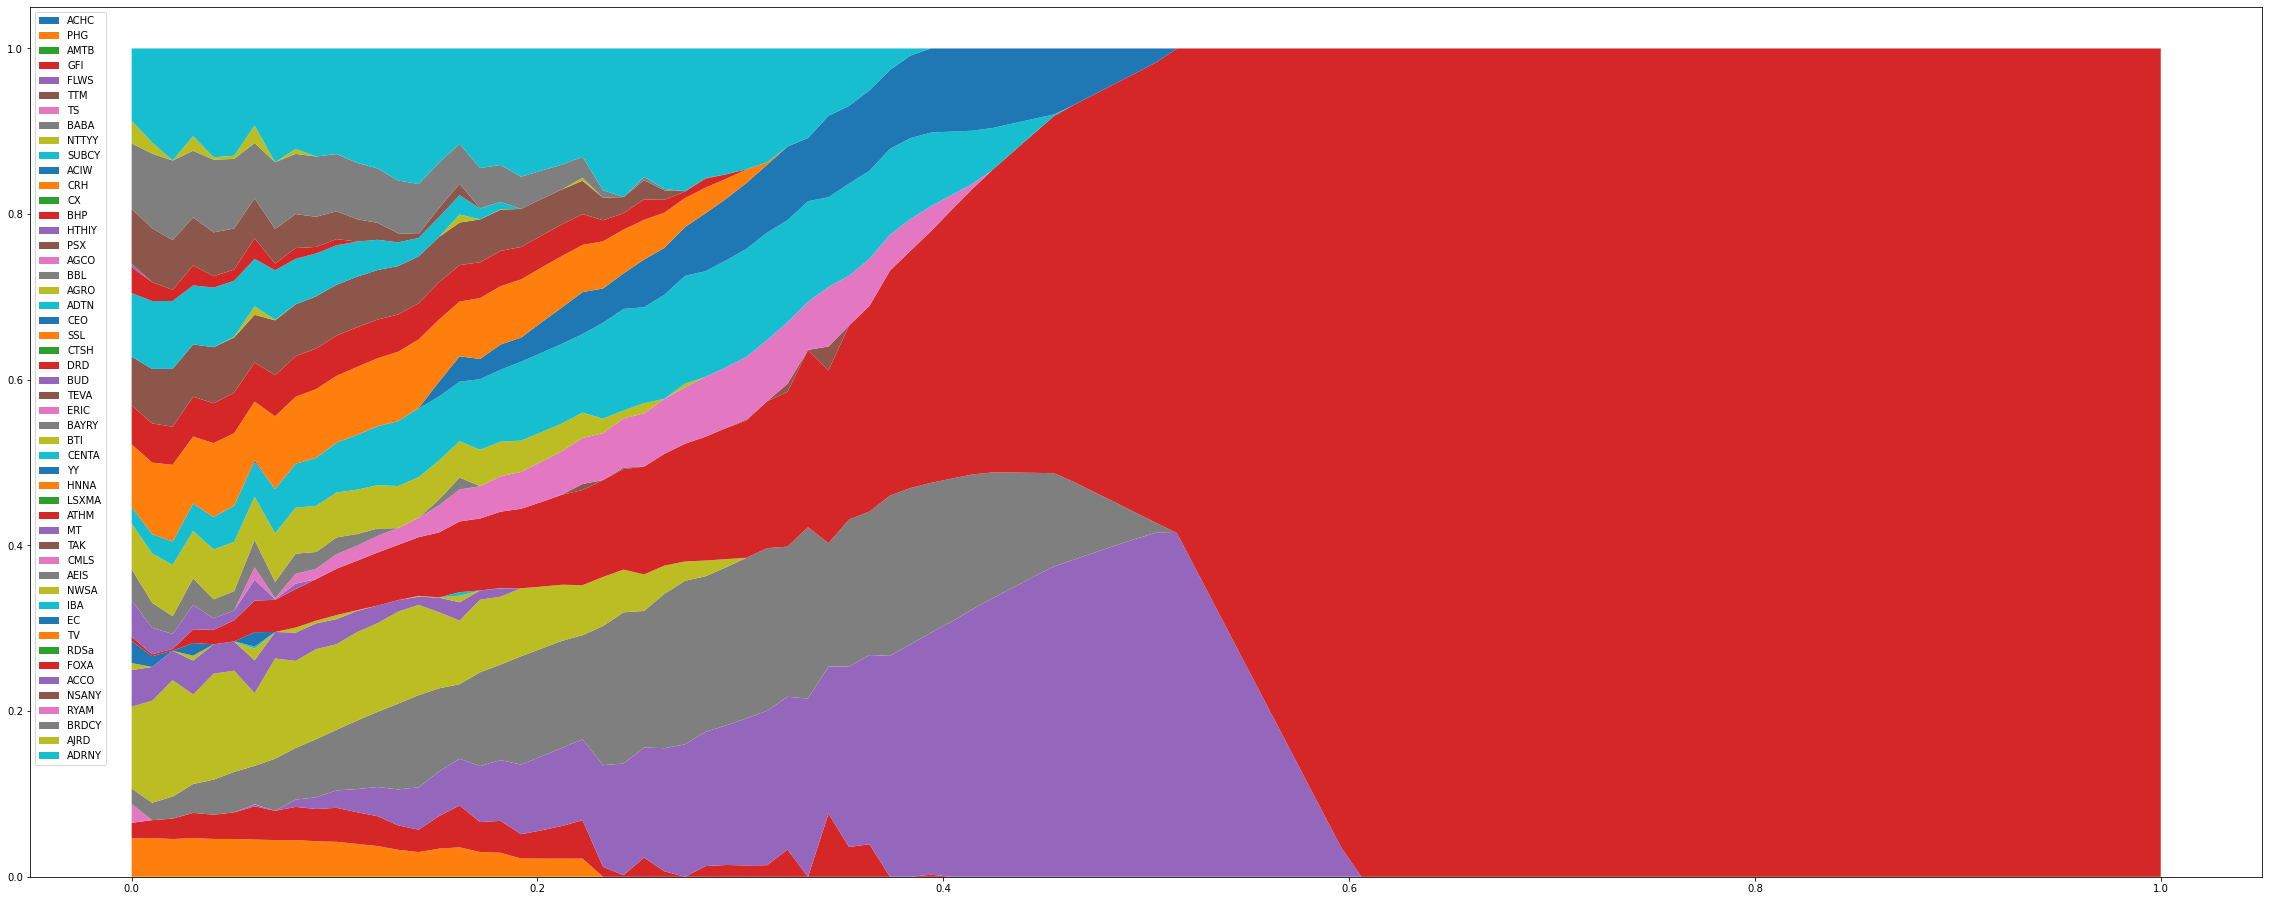

In [36]:
plt.figure(figsize=(40, 16))
plt.stackplot(rate, y, labels=labels)
plt.legend(loc='upper left')
plt.show()

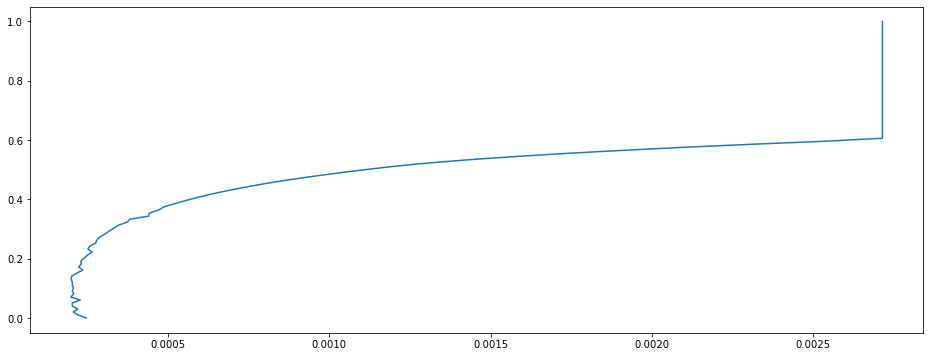

In [37]:
opti_vars = list(map(lambda res: res.fun, opti))
plt.figure(figsize=(16, 6))
plt.plot(opti_vars, rate)
plt.show()

In [ ]:
list(map(len, list(map(lambda x: list(x.stock_diff), stock_data))))

In [ ]:
print(mu)
print(var)
print(R)
print(opti_vars)

In [ ]:
opti

In [ ]:
investpy.get_stock_financial_summary(stock_data[0].stock, stock_data[0].country, summary_type='balance_sheet')